# Assignment 4

## Downloading the data

I downloaded a subset of the data using 27 variables for 68846 cases in subset. I have chosen the variables considering that I will run some analysis on marriage and voting behavior in years 2000 and 2004. However, data included many missing values as .u, .i and .n.

In [148]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Desktop/sub-data.csv")

# Display the first few rows
print(df.head())

# Display dataset info
print(df.info())


   year  id age sex race ethnic educ hapcohab workdy workhr  ... hrs2 earnrs  \
0  1972   1  23   2    1     .u   16       .i      2      1  ...   .i      1   
1  1972   2  70   1    1     14   10       .i     .i     .i  ...   .i      0   
2  1972   3  48   2    1     15   12       .i     .i     .i  ...   .i      2   
3  1972   4  27   2    1     37   17       .i      1      1  ...   .i      2   
4  1972   5  61   2    1     27   12       .i     .i     .i  ...   .i      1   

  income rincome vote00 pres00 if00who vote04 pres04 if04who  
0     .i      .i     .i     .i      .i     .i     .i      .i  
1     .i      .i     .i     .i      .i     .i     .i      .i  
2     .i      .i     .i     .i      .i     .i     .i      .i  
3     .i      .i     .i     .i      .i     .i     .i      .i  
4     .i      .i     .i     .i      .i     .i     .i      .i  

[5 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68846 entries, 0 to 68845
Data columns (total 27 columns):
 #   Colu

/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/142059963.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Desktop/sub-data.csv")


In [149]:
# Check missing values
print(df.isnull().sum())

year        0
id          0
age         0
sex         0
race        0
ethnic      0
educ        0
hapcohab    0
workdy      0
workhr      0
spdays      0
sphour      0
marital     0
agewed      0
divorce     0
widowed     0
wrkstat     0
hrs2        0
earnrs      0
income      0
rincome     0
vote00      0
pres00      0
if00who     0
vote04      0
pres04      0
if04who     0
dtype: int64


## Cleaning the data

#### I filtered the responders so that only respondents with age of wedding is available. I also filtered out any .u values in any column.

In [150]:
# Replace '.u' with NaN
df = df.replace(' .u', np.nan)
df['agewed'] = df['agewed'].replace('.i', np.nan)
##df['hapcohab'] = df['hapcohab'].replace('.i', np.nan)

# Drop rows with NaN in any column
df = df.dropna()

print(df.head())

   year  id age sex race ethnic educ hapcohab workdy workhr  ... hrs2 earnrs  \
1  1972   2  70   1    1     14   10       .i     .i     .i  ...   .i      0   
2  1972   3  48   2    1     15   12       .i     .i     .i  ...   .i      2   
3  1972   4  27   2    1     37   17       .i      1      1  ...   .i      2   
4  1972   5  61   2    1     27   12       .i     .i     .i  ...   .i      1   
6  1972   7  28   1    1     14   13       .i      1      1  ...   .i      1   

  income rincome vote00 pres00 if00who vote04 pres04 if04who  
1     .i      .i     .i     .i      .i     .i     .i      .i  
2     .i      .i     .i     .i      .i     .i     .i      .i  
3     .i      .i     .i     .i      .i     .i     .i      .i  
4     .i      .i     .i     .i      .i     .i     .i      .i  
6     .i      .i     .i     .i      .i     .i     .i      .i  

[5 rows x 27 columns]


### Many columns were not seen as integers since they included some non-integer values. I filtered them out to have the following columns in integer data type. The total data points decreased to 17952

In [151]:
columns_to_convert = ['age', 'sex', 'race', 'ethnic', 'educ', 'income', 'agewed']

# Replace '.u' or other non-numeric values with NaN
df[columns_to_convert] = df[columns_to_convert].replace('.u', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace(' .u', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace(' .n', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.n', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.d', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.r', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.i', np.nan)


# Drop rows with NaN in the specified columns
df = df.dropna(subset=columns_to_convert)

# Convert the specified columns to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Check the updated DataFrame
print(df[columns_to_convert].head())
df.describe()

      age  sex  race  ethnic  educ  income  agewed
1613   54    1     1      11     6       9      29
1614   51    2     1       7     8       7      21
1615   36    2     1      13    11       9      17
1617   54    2     1      11     8       9      18
1618   41    2     1      15    12       9      23


,year,id,age,sex,race,ethnic,educ,agewed,income
count,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000,17952.000000
mean,1984.133189,895.527406,47.328320,1.568739,1.164996,15.982899,12.367981,22.344697,9.569296
std,7.781522,674.955015,16.492819,0.495266,0.441767,15.461421,3.153432,4.874739,2.865213
min,1973.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,12.000000,1.000000
25%,1977.000000,407.000000,34.000000,1.000000,1.000000,8.000000,11.000000,19.000000,9.000000
50%,1984.000000,812.000000,45.000000,2.000000,1.000000,11.000000,12.000000,21.000000,10.000000
75%,1989.000000,1233.250000,60.000000,2.000000,1.000000,19.000000,14.000000,24.000000,12.000000
max,2006.000000,4504.000000,89.000000,2.000000,3.000000,97.000000,20.000000,90.000000,12.000000


## Sample visualization on the dataset

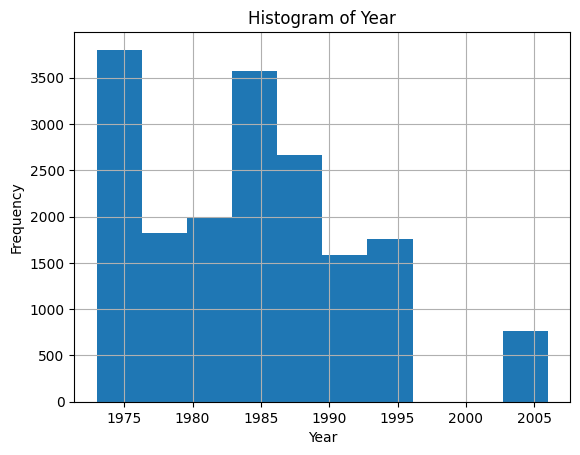

In [152]:
import matplotlib.pyplot as plt

df['year'].hist()
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

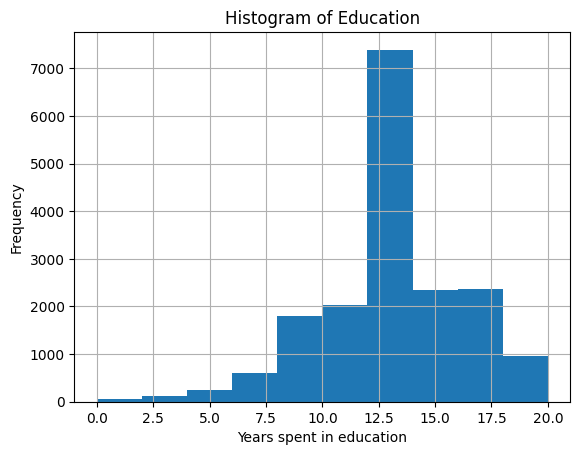

In [153]:
df['educ'].hist()
plt.title('Histogram of Education')
plt.xlabel('Years spent in education')
plt.ylabel('Frequency')
plt.show()

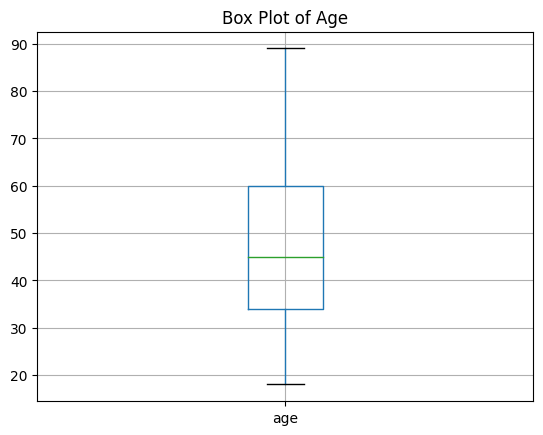

In [154]:
df.boxplot(column=['age'])
plt.title('Box Plot of Age')
plt.show()

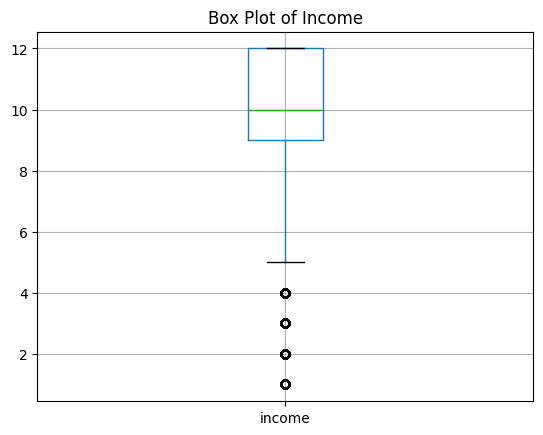

In [155]:
df.boxplot(column=['income'])
plt.title('Box Plot of Income')
plt.show()

## Inferential Statistics

#### I compare age and education level with income for t-tests with hypothesis that as number of years spent in education increases, income increases.

In [156]:
from scipy.stats import ttest_ind, sem

In [157]:
low_educ_group = df[df['educ'] <= df['educ'].median()]['income']
high_educ_group = df[df['educ'] > df['educ'].median()]['income']

# Perform t-test
t_stat, p_value = ttest_ind(low_educ_group, high_educ_group)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Calculate confidence intervals for both groups
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_error = sem(data)  # Standard error of the mean
    margin_of_error = std_error * 1.96  # For 95% confidence
    return mean - margin_of_error, mean + margin_of_error

# Confidence intervals
low_ci = calculate_confidence_interval(low_educ_group)
high_ci = calculate_confidence_interval(high_educ_group)

print(f"95% Confidence Interval for Low Education Group: {low_ci}")
print(f"95% Confidence Interval for High Education Group: {high_ci}")

T-statistic: -43.76192434541328, P-value: 0.0
95% Confidence Interval for Low Education Group: (8.802245263201561, 8.915923288421935)
95% Confidence Interval for High Education Group: (10.633362253782002, 10.733838662073753)


In [158]:
low_educ_group = df[df['age'] <= df['age'].median()]['income']
high_educ_group = df[df['age'] > df['age'].median()]['income']

# Perform t-test
t_stat, p_value = ttest_ind(low_educ_group, high_educ_group)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Confidence intervals
low_ci = calculate_confidence_interval(low_educ_group)
high_ci = calculate_confidence_interval(high_educ_group)

print(f"95% Confidence Interval for Low Education Group: {low_ci}")
print(f"95% Confidence Interval for High Education Group: {high_ci}")

T-statistic: 21.136773116101853, P-value: 5.6951904841738805e-98
95% Confidence Interval for Low Education Group: (9.952893683802683, 10.055793470068531)
95% Confidence Interval for High Education Group: (9.045559643557562, 9.176560910028163)


## Correlation Analysis



In [215]:
correlation_matrix = df[['agewed', 'income', 'educ', 'age']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          agewed    income      educ       age
agewed  1.000000  0.075925  0.151189  0.217365
income  0.075925  1.000000  0.437002 -0.208200
educ    0.151189  0.437002  1.000000 -0.273564
age     0.217365 -0.208200 -0.273564  1.000000


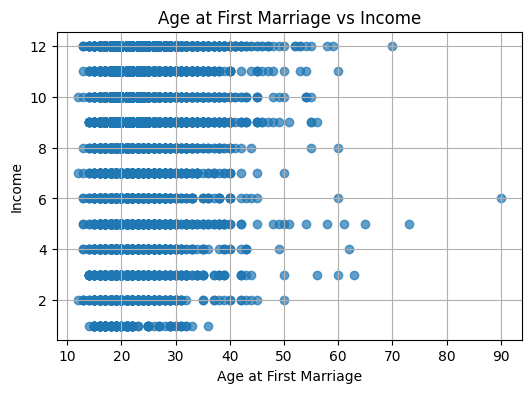

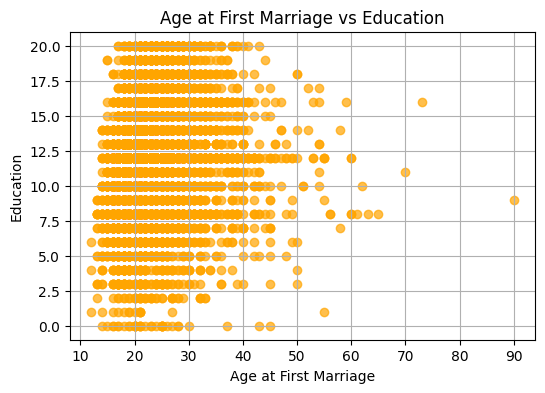

In [216]:
# Scatter plot for agewed vs income
plt.figure(figsize=(6, 4))
plt.scatter(df['agewed'], df['income'], alpha=0.7)
plt.title('Age at First Marriage vs Income')
plt.xlabel('Age at First Marriage')
plt.ylabel('Income')
plt.grid(True)
plt.show()

# Scatter plot for agewed vs education
plt.figure(figsize=(6, 4))
plt.scatter(df['agewed'], df['educ'], alpha=0.7, color='orange')
plt.title('Age at First Marriage vs Education')
plt.xlabel('Age at First Marriage')
plt.ylabel('Education')
plt.grid(True)
plt.show()

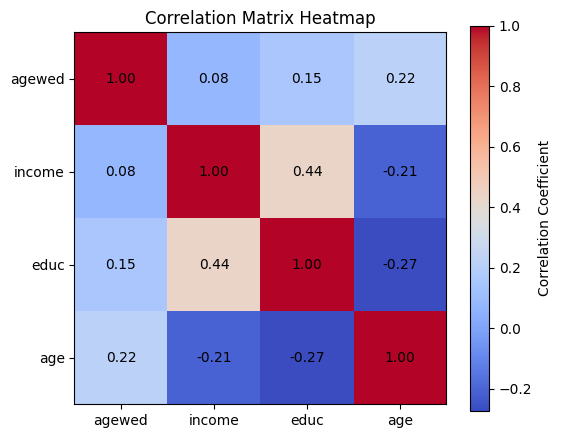

In [217]:
# Visualize the correlation matrix
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation Matrix Heatmap')
plt.show()

## Regression Analysis

In [162]:
from scipy.stats import linregress

In [208]:
# Dependent variable
y = df['income']

# Independent variables
X = df[[ 'age', 'educ', 'agewed']]

# Add an intercept column for OLS
X = np.column_stack((np.ones(X.shape[0]), X))  # Add constant for intercept

In [209]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Coefficients
intercept = beta[0]
age_coeff = beta[1]
educ_coeff = beta[2]
agewed_coeff = beta[3]

print(f"Intercept: {intercept}")
print(f"Coefficient for Age: {age_coeff}")
print(f"Coefficient for Education (educ): {educ_coeff}")
print(f"Coefficient for Age at First Marriage (agewed): {agewed_coeff}")

Intercept: 5.4240106265780845
Coefficient for Age: -0.018507205886585217
Coefficient for Education (educ): 0.36532125746097666
Coefficient for Age at First Marriage (agewed): 0.02250707456068661


In [210]:
y_pred = X @ beta

# Residuals
residuals = y - y_pred

# R-squared
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)

print(f"R-squared: {r_squared}")

R-squared: 0.20079269088384855


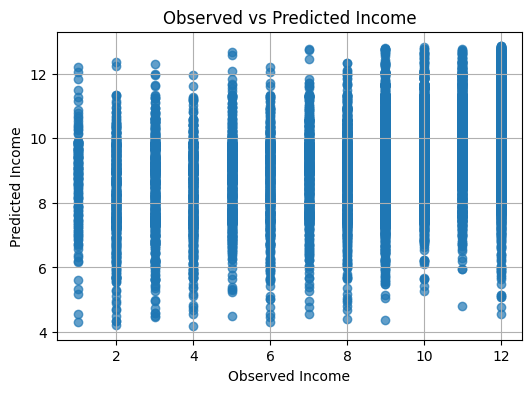

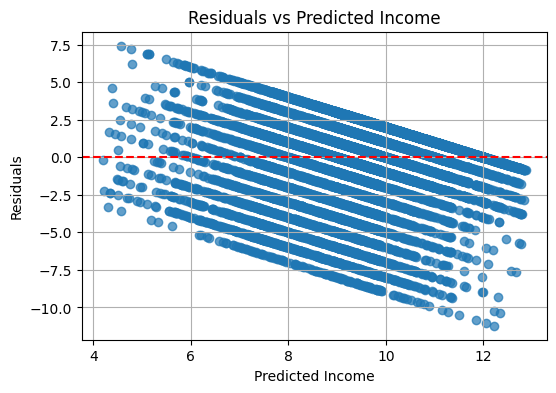

In [211]:
# Scatter plot for observed vs predicted income
plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, alpha=0.7)
plt.title('Observed vs Predicted Income')
plt.xlabel('Observed Income')
plt.ylabel('Predicted Income')
plt.grid(True)
plt.show()

# Residual plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Income')
plt.xlabel('Predicted Income')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## Model Diagnostics

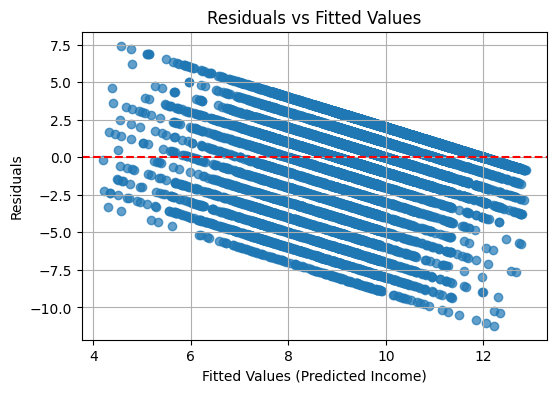

In [212]:
# Residuals vs Fitted Values Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Income)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [213]:
from scipy.stats import f_oneway

# Create squared residuals
residuals_squared = residuals ** 2

# Perform Breusch-Pagan-like test
f_stat, p_value = f_oneway(residuals_squared, y_pred)
print(f"Breusch-Pagan Test F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation: p-value <= 0.05, there’s evidence of heteroscedasticity.?

Breusch-Pagan Test F-statistic: 1216.1840680511236, P-value: 4.4651681378630173e-262


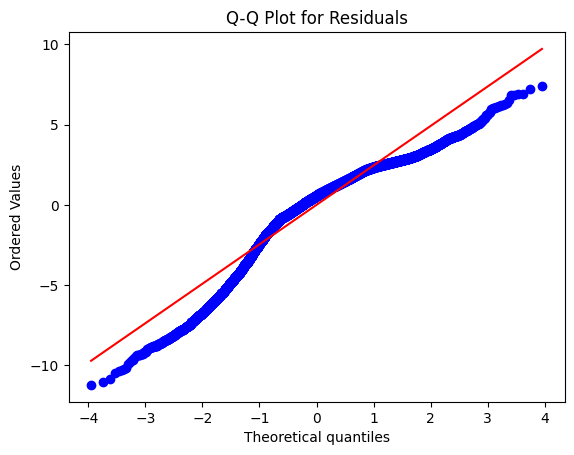

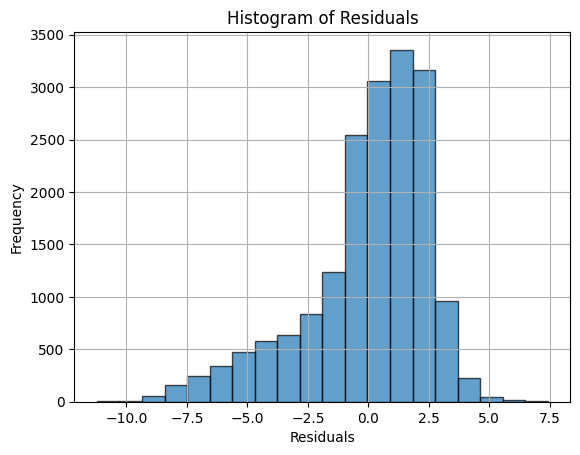

In [214]:
import scipy.stats as stats

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

# Residuals Histogram
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Conclusion

##### Unfortunately, I couldn't run the analysis I thought at the first due to massive amount of missing values. You can see the tries I committed at the below which is related to voting in years 2000 and 2004. 

##### Instead, I inspected the dataset, figured out which columns has enough and matching entries. It seems the broad ones (e.g. age, income, etc.) includes more data points. So I decided to run analysis on them. 
##### I cleaned the set to omit any data row without any desired column data. Then I visualized the resulting dataset to gain better understanding of the data distribution. 

##### I run t-testing on a simple hypothesis that people with more education earns more money. There seems to be a positive correlation as we expected. I also run them with age vs education

##### I did correlation analysis on 4 different variables: income, age, age at first wedding, and education. While age at first wedding seems to have the smallest effect, education and income is positively correlated with each other and inversely correlated with age.

##### I also did linear regression with dependent variable as income and independent variables as the other three. Model seems to be reasonable at its predictions, but I think the original variance in the data is very low preventing a meaningful predictions for the income variable. 

In [218]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Desktop/sub-data.csv")

# Display the first few rows
print(df.head())

# Display dataset info
print(df.info())

   year  id age sex race ethnic educ hapcohab workdy workhr  ... hrs2 earnrs  \
0  1972   1  23   2    1     .u   16       .i      2      1  ...   .i      1   
1  1972   2  70   1    1     14   10       .i     .i     .i  ...   .i      0   
2  1972   3  48   2    1     15   12       .i     .i     .i  ...   .i      2   
3  1972   4  27   2    1     37   17       .i      1      1  ...   .i      2   
4  1972   5  61   2    1     27   12       .i     .i     .i  ...   .i      1   

  income rincome vote00 pres00 if00who vote04 pres04 if04who  
0     .i      .i     .i     .i      .i     .i     .i      .i  
1     .i      .i     .i     .i      .i     .i     .i      .i  
2     .i      .i     .i     .i      .i     .i     .i      .i  
3     .i      .i     .i     .i      .i     .i     .i      .i  
4     .i      .i     .i     .i      .i     .i     .i      .i  

[5 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68846 entries, 0 to 68845
Data columns (total 27 columns):
 #   Colu

/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/3059598006.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Desktop/sub-data.csv")


In [228]:
print(df['vote00'].unique())
print(df['pres00'].unique())
print(df['if00who'].unique())
print(df['pres04'].unique())


['.i' ' 1' ' 3' ' 2' '.d' ' 4' '.n']
['.i' ' 2' ' 3' ' 1' '.n' ' 4' ' 6' '.d']
['.i' ' 2' ' 1' '.d' ' 4' '.n' ' 3']
['.i' ' 1' ' 2' '.n' ' 3' '.d' ' 6']


In [227]:
def candidate_for_00( a:int) -> str:
    if a==1:
        return 'gore'
    if a==2:
        return 'bush'
    if a==3:
        return 'nader'
    if a==4:
        return 'other'
    else:
        return 'didnt'

def candidate_for_04(a:int) -> str:
    if a==1:
        return 'kerry'
    if a==2:
        return 'bush'
    if a==3:
        return 'nader'
    if a==4:
        return 'other'
    else:
        return 'didnt'


In [231]:
df_00 = df
df_00['pres00'] = df['pres00'].replace('.i', np.nan)
df_00['pres00'] = df_00['pres00'].replace('.d', np.nan)
df_00['pres00'] = df_00['pres00'].replace('.n', np.nan)
df_00 = df_00.dropna()
df_00['pres00'] = df_00['pres00'].astype(int)
df_00.describe()

/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/402063510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00['pres00'] = df_00['pres00'].astype(int)


,year,id,pres00
count,5213.000000,5213.000000,5213.000000
mean,2004.008057,1685.151928,1.605793
std,1.643358,1070.417902,0.642106
min,2002.000000,1.000000,1.000000
25%,2002.000000,825.000000,1.000000
50%,2004.000000,1612.000000,2.000000
75%,2006.000000,2383.000000,2.000000
max,2006.000000,4510.000000,6.000000


In [233]:
df_04 = df_00
df_04['pres04'] = df['pres04'].replace('.i', np.nan)
df_04['pres04'] = df_04['pres04'].replace('.d', np.nan)
df_04['pres04'] = df_04['pres04'].replace('.n', np.nan)
df_04 = df_04.dropna()
df_04['pres04'] = df_04['pres04'].astype(int)
df_04.describe()

/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/117665999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_04['pres04'] = df['pres04'].replace('.i', np.nan)
/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/117665999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_04['pres04'] = df_04['pres04'].replace('.d', np.nan)
/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/117665999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,year,id,pres00,pres04
count,1639.0,1639.000000,1639.000000,1639.000000
mean,2006.0,2244.532032,1.596095,1.570470
std,0.0,1274.692528,0.652138,0.622929
min,2006.0,1.000000,1.000000,1.000000
25%,2006.0,1178.000000,1.000000,1.000000
50%,2006.0,2192.000000,2.000000,2.000000
75%,2006.0,3327.500000,2.000000,2.000000
max,2006.0,4510.000000,6.000000,6.000000


In [234]:
df = df_04

In [235]:
columns_to_convert = ['age', 'educ', 'income']

# Replace '.u' or other non-numeric values with NaN
df[columns_to_convert] = df[columns_to_convert].replace('.u', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace(' .u', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace(' .n', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.n', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.d', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.r', np.nan)
df[columns_to_convert] = df[columns_to_convert].replace('.i', np.nan)

/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/3333748788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].replace('.u', np.nan)
/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/3333748788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].replace(' .u', np.nan)
/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/3333748788.py:6: SettingWithCopyWarning: 
A value 

In [237]:
df = df.dropna(subset=columns_to_convert)

# Convert the specified columns to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Check the updated DataFrame
print(df[columns_to_convert].head())
df.describe()

       age  educ  income
46510   50    13      12
46513   50    12      12
46522   26    16       8
46523   60    16      12
46549   25    14      11


/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/618595755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].astype(int)


,year,id,age,educ,income,pres00,pres04
count,1442.0,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,2006.0,2228.945908,52.143551,14.251734,11.363384,1.590153,1.565881
std,0.0,1274.670480,15.698568,2.836710,1.631488,0.645693,0.624639
min,2006.0,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000
25%,2006.0,1167.250000,40.000000,12.000000,12.000000,1.000000,1.000000
50%,2006.0,2165.000000,51.000000,14.000000,12.000000,2.000000,2.000000
75%,2006.0,3316.250000,63.000000,16.000000,12.000000,2.000000,2.000000
max,2006.0,4510.000000,89.000000,20.000000,12.000000,6.000000,6.000000


In [239]:
df['pres00_candidate'] = df['pres00'].apply(candidate_for_00)
df['pres04_candidate'] = df['pres04'].apply(candidate_for_04)

# View mapped data
print(df[['pres00_candidate', 'pres04_candidate']].head())

      pres00_candidate pres04_candidate
46510             gore            kerry
46513             gore            kerry
46522            nader            kerry
46523             gore            kerry
46549             gore            kerry


/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/2927572407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pres00_candidate'] = df['pres00'].apply(candidate_for_00)
/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/2927572407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pres04_candidate'] = df['pres04'].apply(candidate_for_04)


In [240]:
# Identify voters who changed their vote
df['vote_changed'] = df['pres00_candidate'] != df['pres04_candidate']

# Count voters who changed their vote
vote_change_counts = df['vote_changed'].value_counts()
print("Vote Change Counts:\n", vote_change_counts)

Vote Change Counts:
 vote_changed
True     774
False    668
Name: count, dtype: int64


/var/folders/lp/_4_lv8415gl4w1v7n2kr08d40000gn/T/ipykernel_42996/3778045194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_changed'] = df['pres00_candidate'] != df['pres04_candidate']


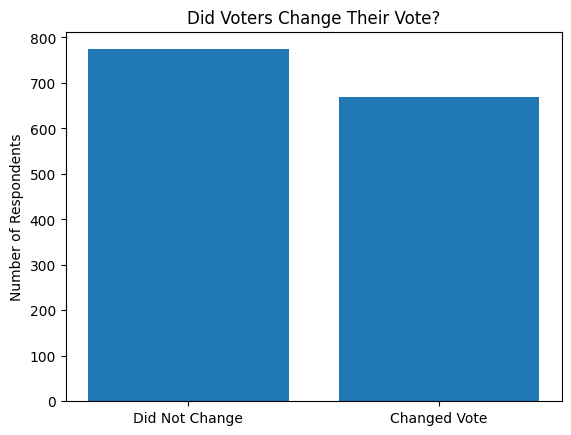

In [241]:

plt.bar(['Did Not Change', 'Changed Vote'], vote_change_counts)
plt.title('Did Voters Change Their Vote?')
plt.ylabel('Number of Respondents')
plt.show()

In [242]:
# Compute correlation with 'vote_changed'
correlations = df[['age', 'educ', 'income', 'vote_changed']].corr()
print("Correlations with Vote Change:\n", correlations)

Correlations with Vote Change:
                    age      educ    income  vote_changed
age           1.000000 -0.201027 -0.141307     -0.028279
educ         -0.201027  1.000000  0.234680      0.034898
income       -0.141307  0.234680  1.000000     -0.056501
vote_changed -0.028279  0.034898 -0.056501      1.000000


2000 Candidate Preference:
 pres00_candidate
bush     728
gore     669
nader     22
other     18
didnt      5
Name: count, dtype: int64
2004 Candidate Preference:
 pres04_candidate
bush     728
kerry    682
nader     24
didnt      8
Name: count, dtype: int64


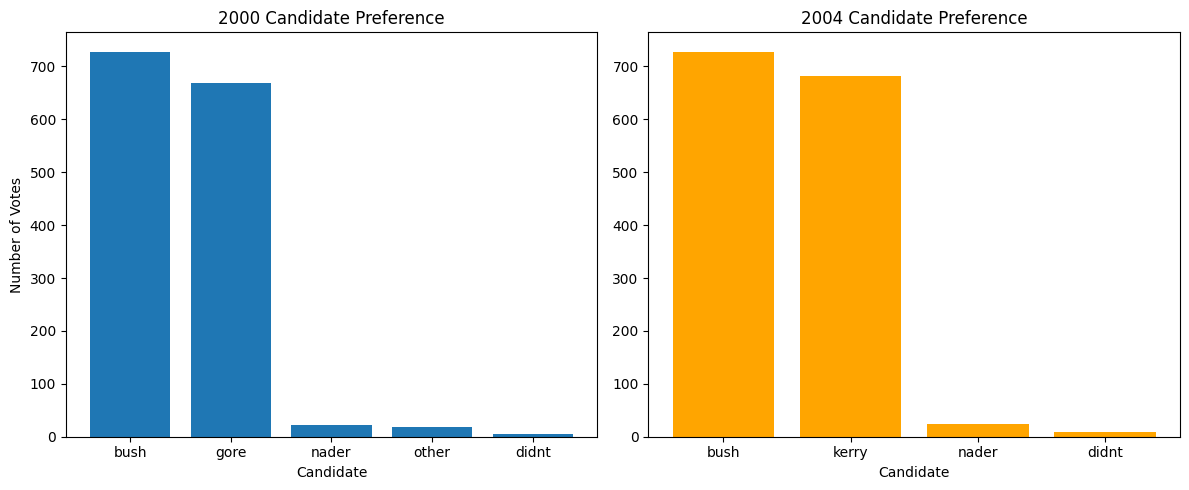

In [244]:
# Count candidate preferences
pres00_counts = df['pres00_candidate'].value_counts()
pres04_counts = df['pres04_candidate'].value_counts()

print("2000 Candidate Preference:\n", pres00_counts)
print("2004 Candidate Preference:\n", pres04_counts)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(pres00_counts.index, pres00_counts)
plt.title('2000 Candidate Preference')
plt.xlabel('Candidate')
plt.ylabel('Number of Votes')

plt.subplot(1, 2, 2)
plt.bar(pres04_counts.index, pres04_counts, color='orange')
plt.title('2004 Candidate Preference')
plt.xlabel('Candidate')

plt.tight_layout()
plt.show()

In [245]:
educ_income_by_candidate = df.groupby('pres04_candidate')[['educ', 'income']].mean()
print("Education and Income by Candidate Preference:\n", educ_income_by_candidate)



Education and Income by Candidate Preference:
                        educ     income
pres04_candidate                      
bush              14.148352  11.462912
didnt             13.750000  11.750000
kerry             14.328446  11.240469
nader             15.375000  11.708333


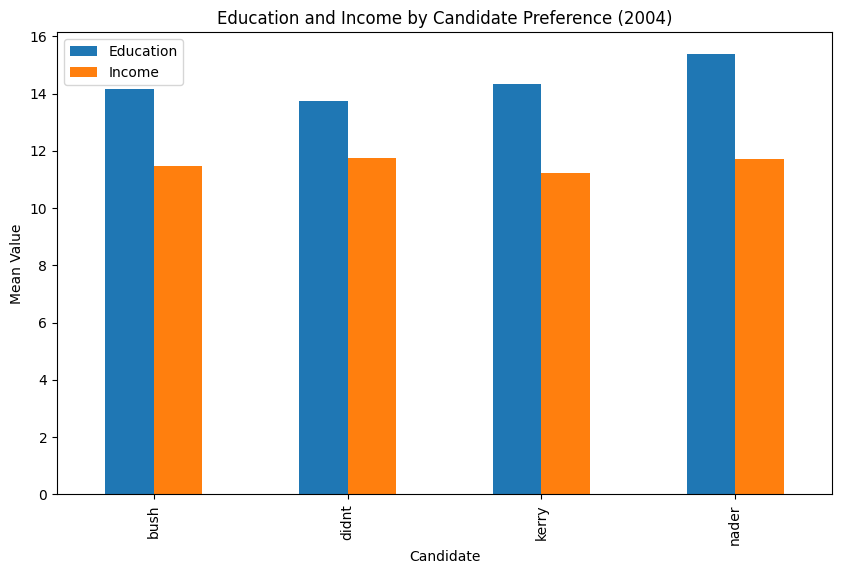

In [246]:
educ_income_by_candidate.plot(kind='bar', figsize=(10, 6))
plt.title('Education and Income by Candidate Preference (2004)')
plt.ylabel('Mean Value')
plt.xlabel('Candidate')
plt.legend(['Education', 'Income'])
plt.show()